In [47]:
import numpy as np
import scipy.stats as stats
from scipy.signal import peak_widths, find_peaks
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import itertools
from tqdm.contrib.itertools import product
import pandas as pd
from matplotlib.collections import LineCollection
from memento import *
from scipy.optimize import curve_fit




(30.0, 120.0)

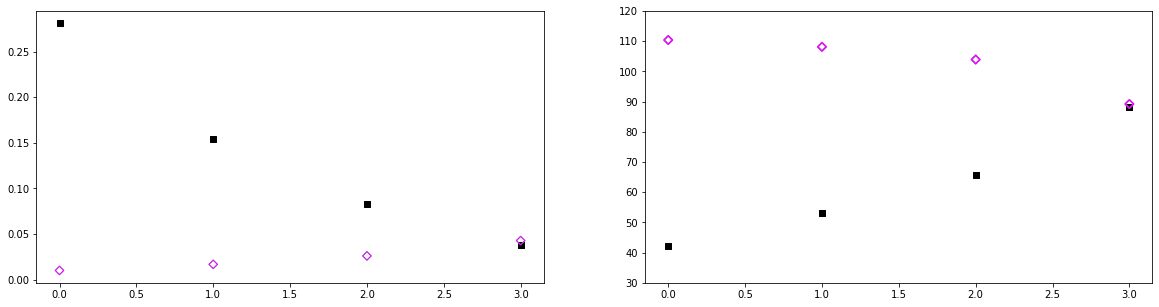

In [30]:
layer_sizes = [100, 100, 100, 100, 100, 100]
kappas = [50, 40, 30, 10, 4]       
# kappas = [10, 10, 10]      
k_input = 20
recurrence = 'cosine2'

n_timesteps=500
stim_on=500

results = {}

# Initialize model
model = DynaToy(layer_sizes)
model.W_ff_0 = 0.03
model.W_fb_0 = 0.03

## FEED FORWARD
# Init Model Weights
model.W_r_0 = [0, 0, 0, 0, 0, 0]
model.W, W_L = model.init_weights(plot = False, kappas = kappas, return_matrices=True, recurrence = recurrence)
# input
h = vonmises_input(model, k_input, input_layer = 'in')
h = h/np.linalg.norm(h)
# simulate
_, T_ff, W_ff, A_ff = simulate(model, n_timesteps, stim_on, h)

# Reset model
model.reset()

## FEED BACK BASELINE
# Init Model Weights
model.W_r_0 = [0, 0, 0, 0, 0, 0]
model.W, W_L = model.init_weights(plot = False, kappas = kappas, return_matrices=True, recurrence = recurrence)
## feed back input
h = vonmises_input(model, k_input, input_layer = 'out')
h = h / np.linalg.norm(h) / 3
# simulate
_, T_fb_0, W_fb_0, A_fb_0 = simulate(model, n_timesteps, stim_on, h)



# Reset model
model.reset()

## FEED BACK 
# Init Model Weights
model.W_r_0 = [0, 0, 0, 0, 0, 0] # Similar results to near far split: [0, 0, 4, 1, 0, 0]
model.W, W_L = model.init_weights(plot = False, kappas = kappas, return_matrices=True, recurrence = recurrence)
## feed back input
h = vonmises_input(model, k_input, input_layer = 'out')
h = h / np.linalg.norm(h) / 3
# simulate
_, T_fb, W_fb, A_fb = simulate(model, n_timesteps, stim_on, h)


fig, axs = plt.subplots(1, 2, figsize = [20, 5])

axs[1].scatter(x = range(len(model.layer_sizes) - 2), y=W_ff[1:-1, stim_on-1], color = 'black', marker = 's')
axs[1].scatter(x = range(len(model.layer_sizes) - 2), y=W_fb_0[1:-1, stim_on-1], facecolors = 'none', edgecolors = 'lightseagreen', marker = 'D', linewidth =1.5)
axs[1].scatter(x = range(len(model.layer_sizes) - 2), y=W_fb[1:-1, stim_on-1], facecolors = 'none',  edgecolors = 'magenta', marker = 'D', linewidth = 1.5)
axs[0].scatter(x = range(len(model.layer_sizes) - 2), y=A_ff[1:-1, stim_on-1], color = 'black', marker = 's')
axs[0].scatter(x = range(len(model.layer_sizes) - 2), y=A_fb_0[1:-1, stim_on-1], facecolors = 'none',  edgecolors = 'lightseagreen', marker = 'D')
axs[0].scatter(x = range(len(model.layer_sizes) - 2), y=A_fb[1:-1, stim_on-1], facecolors = 'none',  edgecolors = 'magenta', marker = 'D')

axs[1].set_ylim([30, 120])







[3.16929216e-04 4.53724300e-01 1.42719008e-03] 0.33682981725793115


/var/folders/86/mx5k0dps5gb_vlv7mwrrymd00000gn/T/ipykernel_1291/3565261852.py:2: RuntimeWarning: overflow encountered in exp
  y = (1 / (1 + np.exp(-k * (x - x0)))) + np.log(c)


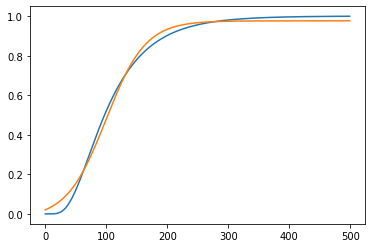

In [39]:
ydata  = A_fb[0].copy()
ydata /= ydata.max()

l_popt, l_pcov = curve_fit(logistic, xdata=np.arange(0, n_timesteps, 1), ydata=ydata, maxfev=5000)
l_perr = np.sqrt(np.diag(l_pcov))


l_hat = logistic(np.arange(0, n_timesteps, 1), *l_popt)


l_err = np.sum(np.square(l_hat - ydata))


print(l_perr, l_err)
plt.plot(ydata)

plt.plot(l_hat)

In [41]:
T_fb.shape

(600, 500)

In [31]:
# Reset model
model.reset()

## FEED BACK 
# Init Model Weights
model.W_r_0 = [0, 0, 0, 0, 0, 0] # Similar results to near far split: [0, 0, 4, 1, 0, 0]
model.W, W_L = model.init_weights(plot = False, kappas = kappas, return_matrices=True, recurrence = recurrence)
## feed back input
h = vonmises_input(model, k_input, input_layer = 'out')
h = h / np.linalg.norm(h) / 3
# simulate
_, T_fb, W_fb, A_fb = simulate(model, n_timesteps, stim_on, h)

In [37]:
15**4

50625

In [48]:
R_1 = np.linspace(-2, 5, 200)
R_2 = np.linspace(-2, 5, 200)
R_3 = np.linspace(-2, 5, 20)
R_4 = np.linspace(-2, 5, 20)


# Initialize model
model = DynaToy(layer_sizes)
model.W_ff_0 = 0.03
model.W_fb_0 = 0.03

rows = []
# Loop through
i=0
for keys in product(R_1, R_2, R_3, R_4):
    i+=1

  0%|          | 0/16000000 [00:00<?, ?it/s]